#  ARIMA에 계절성 추가: SARIMA 모델

---

##  1. ARIMA vs. SARIMA 비교

| 모델 | 설명 |
|------|------|
| **ARIMA(p, d, q)** | 비계절성 시계열 모델 (자기회귀 + 차분 + 이동평균) |
| **SARIMA(p, d, q)(P, D, Q, s)** | 계절성까지 고려한 ARIMA 모델<br>→ 계절 AR(P), 계절 차분(D), 계절 MA(Q), 계절 주기(s)를 추가 |

---

##  2. SARIMA 수식 개념

$$
SARIMA(p, d, q)(P, D, Q, s)
$$

- $p$, $d$, $q$: 일반 ARIMA의 순서
- $P$, $D$, $Q$: **계절 AR, 계절 차분, 계절 MA**
- $s$: **계절 주기** (예: 월별 데이터라면 $s = 12$)

---

##  3. SARIMA 모델이 필요한 상황

- 월별, 분기별, 주기적으로 반복되는 패턴이 있는 경우
- 예: 여름에 판매 증가, 겨울에 감소하는 아이스크림 매출

---



2020-01-31     3.528105
2020-02-29     6.300314
2020-03-31    11.617730
2020-04-30    15.981786
2020-05-31    14.395370
2020-06-30     5.545444
2020-07-31     4.900177
2020-08-31    -1.802714
2020-09-30    -4.866692
2020-10-31    -4.678803
2020-11-30    -3.372167
2020-12-31     3.408547
2021-01-31     7.522075
2021-02-28    11.743350
2021-03-31    16.547981
2021-04-30    18.167349
2021-05-31    19.648412
2021-06-30    13.089683
2021-07-31     9.626135
2021-08-31     2.791809
2021-09-30    -3.766234
2021-10-31     1.807237
2021-11-30     4.068618
2021-12-31     5.015670
2022-01-31    16.539509
2022-02-28    14.591269
2022-03-31    21.751771
2022-04-30    23.125632
2022-05-31    25.725812
2022-06-30    22.438718
2022-07-31    15.309895
2022-08-31    11.256325
2022-09-30     5.564174
2022-10-31     2.538407
2022-11-30     7.643922
2022-12-31    12.812698
2023-01-31    20.460581
2023-02-28    25.904760
2023-03-31    26.885600
2023-04-30    28.895394
2023-05-31    26.563148
2023-06-30    22

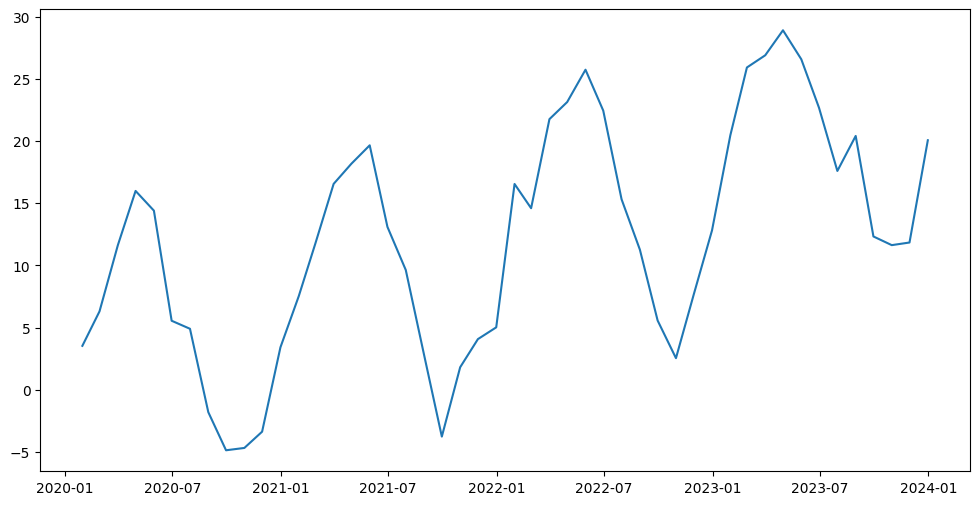

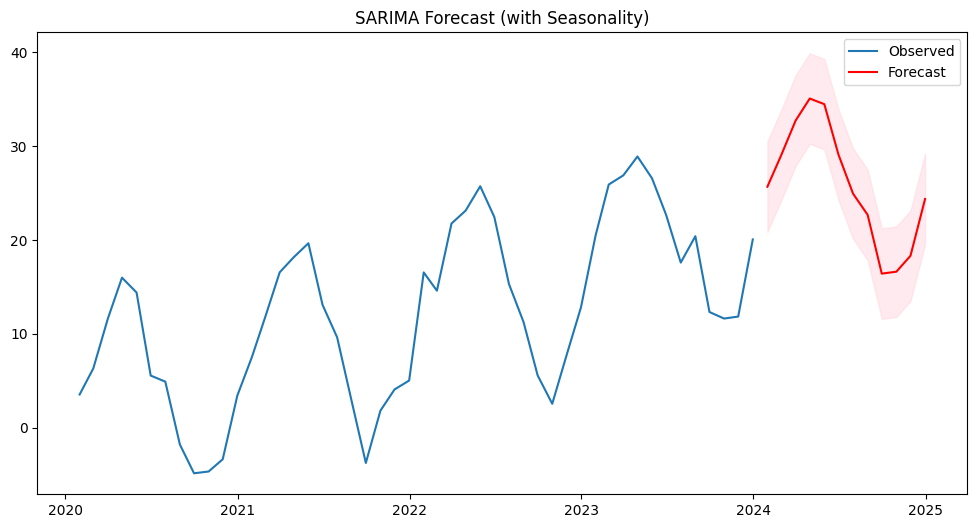

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.simplefilter('ignore')

# 1. 예시: 계절성을 가진 시계열 데이터 생성
np.random.seed(0)
n_periods = 48  # 4년치 월별 데이터
seasonality = 10 * np.sin(np.arange(n_periods) * 2 * np.pi / 12)
trend = 0.5 * np.arange(n_periods)
noise = np.random.normal(0, 2, n_periods)
data = seasonality + trend + noise


# 2. 시계열로 변환
date_range = pd.date_range(start="2020-01-01", periods=n_periods, freq='M')
ts = pd.Series(data, index=date_range)
print( ts )
plt.figure(figsize=(12,6))
plt.plot(ts, label="Observed")

# 3. SARIMA 모델 적합
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# 4. 예측
forecast = result.get_forecast(steps=12)
conf_int = forecast.conf_int()

# 5. 시각화
plt.figure(figsize=(12,6))
plt.plot(ts, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast (with Seasonality)")
plt.legend()
plt.show()

 seasonal_order=(P, D, Q, m) 의미

| 항목  | 의미             | 설명                                            |
| --- | -------------- | --------------------------------------------- |
| `P` | 계절 AR(자기회귀) 차수 | 이전 계절의 값들이 현재 값에 얼마나 영향을 주는지 결정               |
| `D` | 계절 차분 차수       | 계절성 추세를 제거하기 위해 얼마나 차분할 것인지 (ex: 1년 전 값과의 차)  |
| `Q` | 계절 MA(이동평균) 차수 | 계절 노이즈(오차)가 현재 값에 얼마나 영향을 주는지 결정              |
| `m` | **계절 주기**      | 몇 시점마다 주기적 반복이 일어나는지 설정 (ex: 월별이면 12, 주간이면 7) |


| 항목          | 설명                                       |
| ----------- | ---------------------------------------- |
| 계절성 도입      | SARIMA 모델을 통해 계절 AR(P), MA(Q), 차분(D)을 추가 |
| 계절 주기 $s$ | 계절 패턴 반복 간격 (예: 월별=12, 분기=4 등)           |
| 시계열 구성 요소   | 트렌드 + 계절성 + 불규칙성으로 구성됨                   |


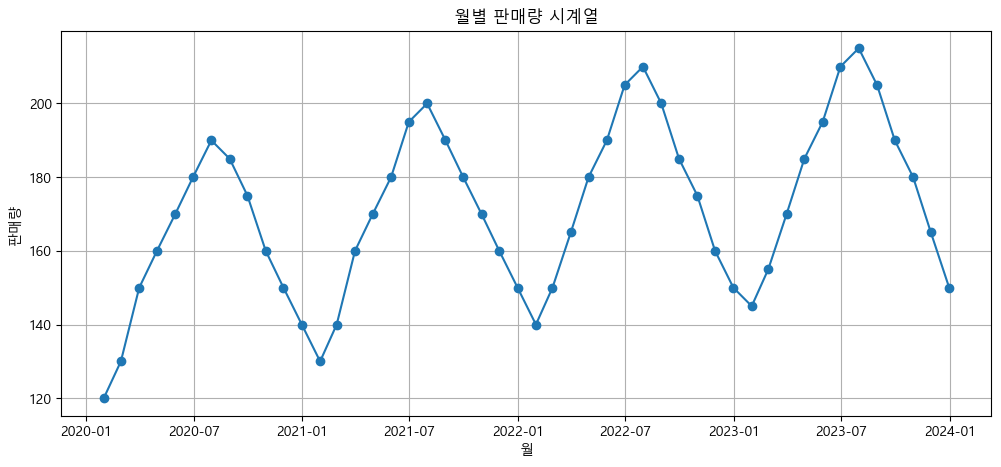

In [ ]:
#  월별 판매량 데이터를 활용한 SARIMA 실습
##  1. 데이터 로딩 및 시각화

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False

# 예시 데이터: 월별 판매량 (2020~2023)
data = {
    'month': pd.date_range(start='2020-01-01', periods=48, freq='M'),
    'sales': [
        120, 130, 150, 160, 170, 180, 190, 185, 175, 160, 150, 140,
        130, 140, 160, 170, 180, 195, 200, 190, 180, 170, 160, 150,
        140, 150, 165, 180, 190, 205, 210, 200, 185, 175, 160, 150,
        145, 155, 170, 185, 195, 210, 215, 205, 190, 180, 165, 150
    ]
}
df = pd.DataFrame(data)
df.set_index('month', inplace=True)

# 시계열 시각화
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['sales'], marker='o')
plt.title("월별 판매량 시계열")
plt.xlabel("월")
plt.ylabel("판매량")
plt.grid(True)
plt.show()


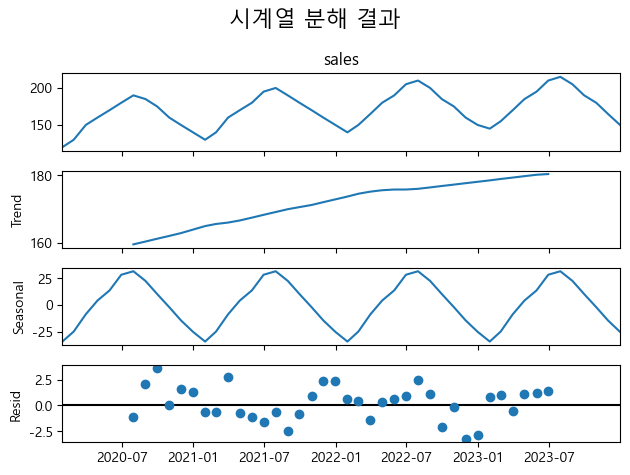

In [ ]:
#  2. 시계열 분해 (계절성 확인)

from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['sales'], model='additive', period=12)
decomposed.plot()
plt.suptitle("시계열 분해 결과", fontsize=16)
plt.tight_layout()
plt.show()


 시계열 요소 분해(Decomposition)

시계열을 **트렌드(Trend), 계절성(Seasonality), 잔차(Residual)** 로 나누는 기법
###  분해 방식
- **추가 모델 (Additive)**:
  
  $$ x_t = T_t + S_t + R_t $$

- **곱셈 모델 (Multiplicative)**:

  $$ x_t = T_t \times S_t \times R_t $$


| 성분       | 의미                     |
| -------- | ---------------------- |
| Trend    | 시간에 따라 느리게 변화하는 **추세** |
| Seasonal | 일정 주기마다 반복되는 **계절성**   |
| Residual | 예측 불가능한 **오차(노이즈)**    |


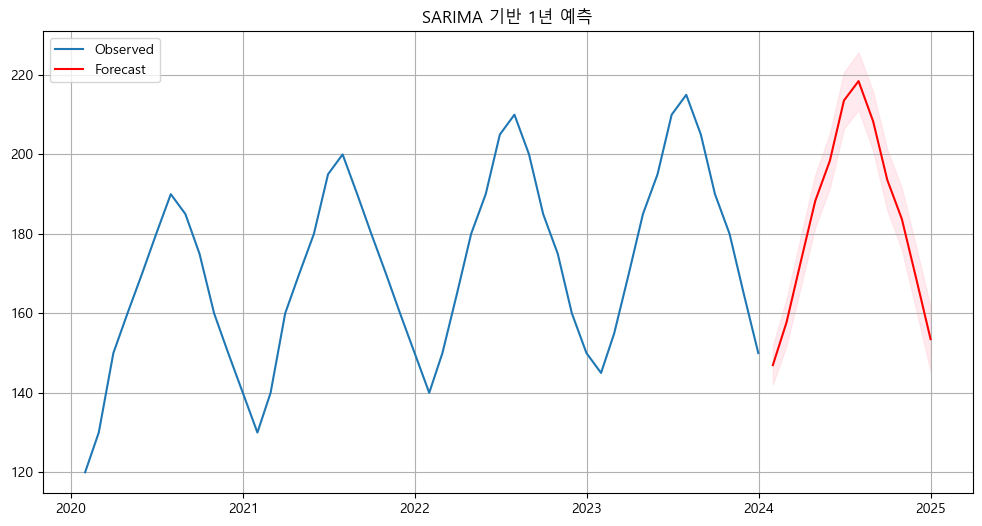

In [ ]:
#  3. SARIMA 모델 학습 및 예측

from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,s): s=12 for monthly
model = SARIMAX(df['sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# 향후 12개월 예측
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                 color='pink', alpha=0.3)
plt.title("SARIMA 기반 1년 예측")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 예측값 출력
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})
forecast_df


,Forecast,Lower CI,Upper CI
2024-01-31,146.979809,142.092868,151.866751
2024-02-29,157.727701,151.871197,163.584204
2024-03-31,173.368362,167.039292,179.697431
2024-04-30,188.287677,181.654239,194.921114
2024-05-31,198.380806,191.512739,205.248874
2024-06-30,213.568876,206.499093,220.638659
2024-07-31,218.450510,211.196319,225.704700
2024-08-31,208.320497,200.892056,215.748939
2024-09-30,193.593397,185.997400,201.189394
2024-10-31,183.737701,175.979093,191.496310


| 항목         | 설명                           |
| ---------- | ---------------------------- |
| **데이터 주기** | 월별 (s = 12)                  |
| **모델 설정**  | SARIMA(1,1,1)(1,1,1,12)      |
| **예측 대상**  | 향후 12개월 판매량                  |
| **활용**     | 월별 수요 예측, 재고 계획, 마케팅 전략 수립 등 |


### auto arima

In [1]:
%pip install pmdarima

   ---------------------------------------- 0.0/719.3 kB ? eta -:--:--
   ---------------------------------------- 719.3/719.3 kB 14.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 40.4 MB/s  0:00:00

   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   --------------------

In [3]:
##  1. auto_arima로 최적 파라미터 탐색
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False

# 예시 데이터: 월별 판매량 (2020~2023)
data = {
    'month': pd.date_range(start='2020-01-01', periods=48, freq='M'),
    'sales': [
        120, 130, 150, 160, 170, 180, 190, 185, 175, 160, 150, 140,
        130, 140, 160, 170, 180, 195, 200, 190, 180, 170, 160, 150,
        140, 150, 165, 180, 190, 205, 210, 200, 185, 175, 160, 150,
        145, 155, 170, 185, 195, 210, 215, 205, 190, 180, 165, 150
    ]
}
df = pd.DataFrame(data)
df.set_index('month', inplace=True)



from pmdarima import auto_arima

# auto_arima로 최적 파라미터 탐색
stepwise_model = auto_arima(
    df['sales'],
    seasonal=True,
    m=12,  # 월별 주기
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)


C:\Users\Dell5371\AppData\Local\Temp\ipykernel_18428\1434028991.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'month': pd.date_range(start='2020-01-01', periods=48, freq='M'),


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=170.140, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=173.761, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=173.362, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=172.140, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=172.140, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=174.140, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=171.761, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=171.364, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=170.092, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=171.865, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=171.860, Time=0.14 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=173.849, Time=0.28 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=171.249, Time=0.06 sec
 ARIMA(1,1,2)(0,1,0)[12]             

In [14]:
# 최적 파라미터 출력
print("최적 모델 요약:")
print(stepwise_model.summary())

최적 모델 요약:
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(1, 1, 3)x(0, 1, [], 12)   Log Likelihood                 -79.881
Date:                             Sat, 07 Jun 2025   AIC                            169.762
Time:                                     18:06:49   BIC                            177.539
Sample:                                 01-31-2020   HQIC                           172.446
                                      - 12-31-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9071      0.175     -5.170      0.000      -1.251      -0.563
ma.L1          0.

## Auto ARIMA

%pip install pmdarima

In [1]:
%pip uninstall numpy -y
%pip install numpy==1.24.4

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ----------------- ---------------------- 6.6/14.8 MB 40.3 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 44.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires numpy<3,>=1.25.2, but you have numpy 1.24.4 which is incompatible.


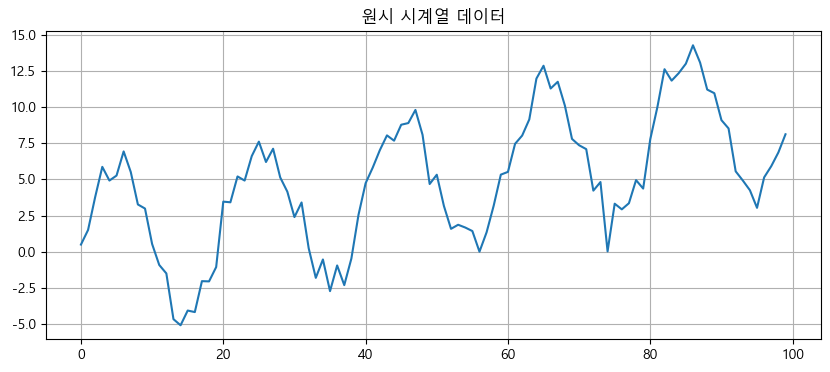

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[20] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[20] intercept   : AIC=392.295, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[20] intercept   : AIC=383.927, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[20] intercept   : AIC=388.611, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[20]             : AIC=390.494, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[20] intercept   : AIC=392.638, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[20] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(1,0,1)[20] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(0,0,1)[20] intercept   : AIC=388.568, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[20] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(1,0,0)[20] intercept   : AIC=384.793, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[20] intercept   : AIC=383.663, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[20] intercept   : AIC=384.275, Time=0.04 sec
 ARIMA(2,1,0)(2,0,0)[20] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(2,1,0)(1,0,1)[20] intercept   : AIC=inf, Time=

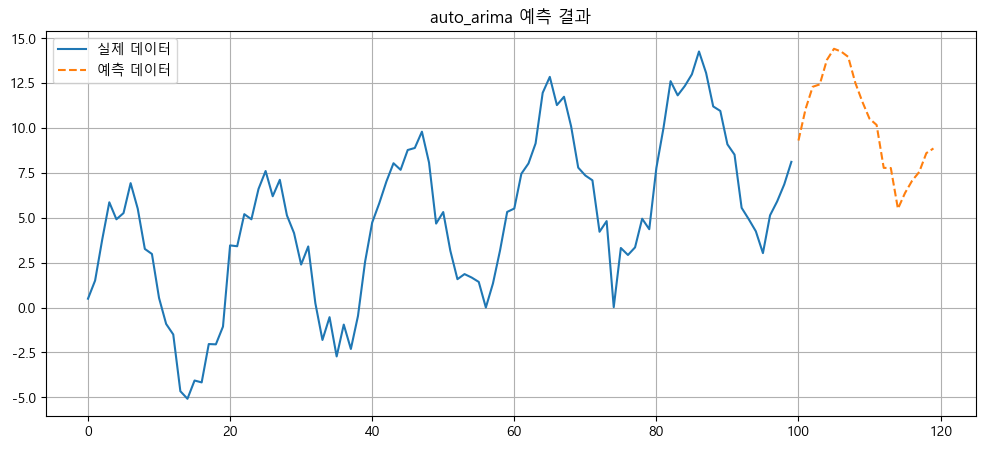

In [2]:
# 📌 Jupyter Notebook Markdown 형식
# ## 🔮 auto_arima를 이용한 시계열 예측

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from warnings import filterwarnings
filterwarnings("ignore")

plt.rcParams['font.family'] ="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False

# 1️ 시계열 데이터 생성
np.random.seed(42)
n = 100
time = np.arange(n)
trend = time * 0.1
seasonality = 5 * np.sin(2 * np.pi * time / 20)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

ts = pd.Series(data)

# 2️ 시계열 그래프
ts.plot(title="원시 시계열 데이터", figsize=(10, 4))
plt.grid(True)
plt.show()

# 3️ auto_arima로 최적 (p,d,q)(P,D,Q,s) 찾기 및 모델 훈련
model = auto_arima(
    ts,
    seasonal=True,
    m=20,  # 주기 설정 (여기선 sin 함수의 주기 20)
    stepwise=True,
    trace=True
)

# 4️ 훈련된 모델 요약
print(model.summary())

# 5️ 미래 20개 시점 예측
n_periods = 20
forecast = model.predict(n_periods=n_periods)

# 6️ 실제 + 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(ts, label='실제 데이터')
plt.plot(np.arange(len(ts), len(ts)+n_periods), forecast, label='예측 데이터', linestyle='--')
plt.title("auto_arima 예측 결과")
plt.legend()
plt.grid(True)
plt.show()


📘 auto_arima() 주요 아규먼트 정리


| 인자명                         | 기본값      | 설명                                              |
| --------------------------- | -------- | ----------------------------------------------- |
| **`y`**                     | 필수       | 시계열 데이터 (`array-like`, `pd.Series`)             |
| **`start_p`**               | 2        | AR(p)의 시작값                                      |
| **`start_q`**               | 2        | MA(q)의 시작값                                      |
| **`max_p`**                 | 5        | AR(p)의 최대값                                      |
| **`max_q`**                 | 5        | MA(q)의 최대값                                      |
| **`d`**                     | `None`   | 차분 차수 (자동 추정 시 `None`)                          |
| **`max_d`**                 | 2        | 최대 차분 차수                                        |
| **`seasonal`**              | `True`   | 계절성 모델 사용 여부                                    |
| **`m`**                     | 1        | 계절성 주기 (예: 월별=12, 일별=7 등)                       |
| **`start_P`**               | 1        | 계절 AR(P)의 시작값                                   |
| **`start_Q`**               | 1        | 계절 MA(Q)의 시작값                                   |
| **`max_P`**                 | 2        | 계절 AR(P)의 최대값                                   |
| **`max_Q`**                 | 2        | 계절 MA(Q)의 최대값                                   |
| **`D`**                     | `None`   | 계절 차분 차수 (자동 추정 시 `None`)                       |
| **`max_D`**                 | 1        | 계절 차분의 최대 차수                                    |
| **`trace`**                 | `False`  | 모델 선택 과정을 출력할지 여부                               |
| **`error_action`**          | `'warn'` | 오류 발생 시 처리 방법 (`'ignore'`, `'warn'`, `'raise'`) |
| **`stepwise`**              | `True`   | **계산 효율**을 위한 stepwise 검색 사용 여부                 |
| **`suppress_warnings`**     | `False`  | 경고 메시지 출력 억제 여부                                 |
| **`n_fits`**                | `50`     | 시도할 최대 모델 수                                     |
| **`information_criterion`** | `'aic'`  | 모델 선택 기준: `'aic'`, `'bic'`, `'hqic'` 등          |
| **`seasonal_test`**         | `'ocsb'` | 계절성 테스트 방법 (`'ocsb'`, `'ch'` 등)                 |
| **`with_intercept`**        | `True`   | 상수항 포함 여부                                       |


 m 인자 정리 (auto_arima()에서 계절성 주기 설정)

| 항목                            | 설명                           |
| ----------------------------- | ---------------------------- |
| 인자명                           | `m`                          |
| 의미                            | **계절성 주기 (seasonal period)** |
| 데이터가 어떤 주기로 **반복되는지**를 알려주는 값 |                              |
| 사용 위치                         | 계절성 모델(SARIMA)을 적용할 때 필수 인자  |
| 기본값                           | `1` (즉, 계절성이 없다고 가정함)        |


 자주 사용하는 m 값 예시

| 데이터 종류          | 주기 설명     | 설정할 `m` 값 |
| --------------- | --------- | --------- |
| 월별 데이터 (1년 주기)  | 12개월마다 반복 | `m=12`    |
| 분기별 데이터 (1년 주기) | 4분기마다 반복  | `m=4`     |
| 주간 데이터 (1년 주기)  | 52주마다 반복  | `m=52`    |
| 일별 데이터 (1주 주기)  | 7일마다 반복   | `m=7`     |
| 일별 데이터 (연간 주기)  | 365일마다 반복 | `m=365`   |
| 생성한 사인파 예제      | 20단위로 반복  | `m=20`    |


결론

m > 1 이면 SARIMA (계절성 포함) 모델을 사용.
- (m > 1이어도 seasonal=True를 반드시 명시해야 SARIMA 모델이 적용됨)

m = 1 이면 ARIMA (비계절성) 모델로 작동.

m 값을 올바르게 설정하지 않으면 계절성이 반영되지 않아 예측력이 떨어질 수 있다.



| 설명      | 역할                              |
| ------- | ------------------------------- |
| ACF 그래프 | 일정 간격마다 **높은 피크**가 있다면 → 주기성 존재 |
| 피크 간격   | 반복되는 주기 → `m` 값 후보              |


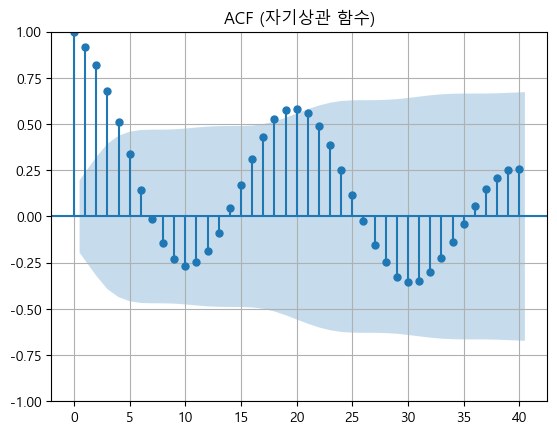

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts, lags=40)
plt.title("ACF (자기상관 함수)")
plt.grid(True)
plt.show()


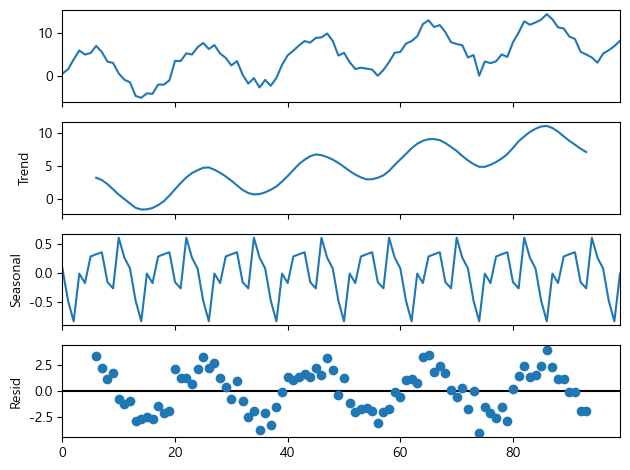

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period=12)  # m 후보
result.plot()
plt.tight_layout()
plt.show()


✅ trace=True

| 항목     | 설명                                                                             |
| ------ | ------------------------------------------------------------------------------ |
| 의미     | 모델 탐색 과정을 **출력**해줌                                                             |
| 용도     | 어떤 `(p,d,q)` 또는 `(P,D,Q,m)` 조합이 시도되었고, 그때의 AIC 등 **성능지표**가 어땠는지를 **눈으로 확인** 가능 |
| 출력 예   | `ARIMA(1,1,1)(0,1,1)[12] AIC=1234.56` 와 같은 로그가 계속 출력됨                          |
| 언제 사용? | 모델이 어떻게 선택되었는지 확인하고 싶을 때 매우 유용                                                 |


✅ stepwise=True

| 항목     | 설명                                                  |
| ------ | --------------------------------------------------- |
| 의미     | **빠르게 최적 모델**을 찾기 위한 **지능적인 탐색 알고리즘** 사용            |
| 방식     | `p`, `q` 값들을 **전부 조합하지 않고**, AIC 기준으로 **좋은 후보만 탐색** |
| 장점     | 속도가 매우 빠름 (전체 탐색보다 수십 배 빠름)                         |
| 단점     | 이론상 **최적 모델을 놓칠 가능성**도 있지만 거의 발생하지 않음               |
| 언제 사용? | 모델 탐색 속도가 중요할 때 (대부분의 경우 `True`로 설정)                |
